<a href="https://colab.research.google.com/github/apekshik/micrograd-from-scratch/blob/main/Reverse_Engineering_Micrograd_apekshik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x):
  return 4*x**3 - 3 * x + 5

In [4]:
xs = np.arange(-5, 5, 0.25) # simple enough. Creates a range of values from -5 to 5 at intervals of 0.25
ys = f(xs)
ys

array([-480.    , -409.4375, -346.    , -289.3125, -239.    , -194.6875,
       -156.    , -122.5625,  -94.    ,  -69.9375,  -50.    ,  -33.8125,
        -21.    ,  -11.1875,   -4.    ,    0.9375,    4.    ,    5.5625,
          6.    ,    5.6875,    5.    ,    4.3125,    4.    ,    4.4375,
          6.    ,    9.0625,   14.    ,   21.1875,   31.    ,   43.8125,
         60.    ,   79.9375,  104.    ,  132.5625,  166.    ,  204.6875,
        249.    ,  299.3125,  356.    ,  419.4375])

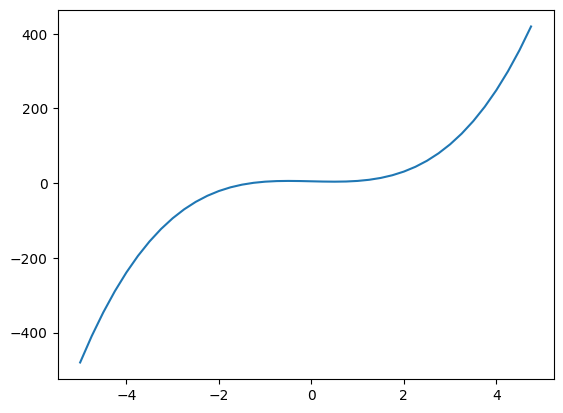

In [5]:
plt.plot(xs, ys)

In [15]:
# Creating a value class that stores values. We'll then move to define how values instances
# are added to each other, subtracted, multiplied, and divided.
class Value:

  def __init__(self, data, _children=(), _op=''):
    self.data = data
    self._prev = set(_children)
    self._op = _op

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    # makes sense the value needs to be further wrapped inside the Value() constructor.
    out = Value(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out



In [16]:
a = Value(2.0)
b = Value(-3.0)
a + b
# a - b will throw an error
c = Value(10.0)
d = a*b + c # translates to (a.__mul__(b)).__add__(c)

In [17]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [18]:
d._op

'+'

## Graph Visualizing Algorithm

In [21]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ data %.4f }" % (n.data,), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

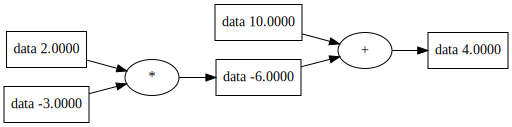

In [22]:
draw_dot(d)